## Семинар 11. Линейная регрессия (часть 2).

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
sns.set()

In [2]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

### Задача №2

В файле "House_prices.csv" представлены характеристики различных домов (стоимость, площадь, количество комнат, год постройки и тп, описание признаков можно найти по ссылке [__Ames Housing dataset__](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)).

Изучить линейную зависимость стоимости домов (SalePrice) от всех остальных показателей.

In [3]:
data = pd.read_csv('House_prices.csv')

In [4]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,222264
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,217555
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,270819
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,176732
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,310680


### Пропуски в данных

Часто в реальных данных не для всех объектов известно значение того или иного признака. Такие объекты нужно обрабатывать прежде, чем приступать к построению линейной регрессии. Для каждого признака посмотрим, в какой доле объектов отсутствует значение.

In [5]:
data.isnull() #TRUE=пропуск

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().any() #TRUE, если в столбце есть хотя бы один TRUE (пропуск)

MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [7]:
clmns = data.columns[data.isnull().any()]
clmns #набор индексов столбцов, в которых есть пропуски

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [8]:
data[clmns].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [9]:
missed = pd.DataFrame(data[clmns].isnull().sum().sort_values(ascending=False) / data.shape[0], columns=['% NULL'])
missed
#ascending=False: отсортируем по убыванию количества пропусков

,% NULL
LotFrontage,0.177397
GarageYrBlt,0.055479
MasVnrArea,0.005479


Пропуски заполним медианным значением

In [10]:
fill = data.median(axis=0) #axis=0: по столбцам
data = data.fillna(value=fill)

### Проверка на мультиколлинеарность

Посмотрим на матрицу корреляций признаков и целевой переменной SalePrice

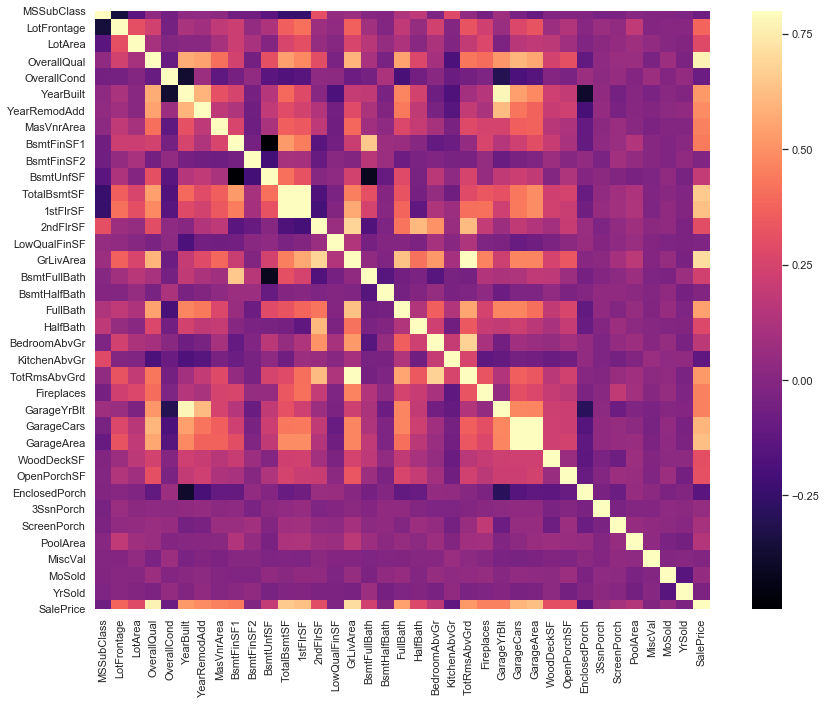

In [11]:
corr = data.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [12]:
corr_df = corr.unstack().to_frame().reset_index()
corr_df.head()
#corr.unstack(): #сделали двухуровневый индекс, получили series (1 столбец со сложным индексом)
#reset_index(): превратили индекс в значения ячеек

,level_0,level_1,0
0,MSSubClass,MSSubClass,1.000000
1,MSSubClass,LotFrontage,-0.356718
2,MSSubClass,LotArea,-0.139781
3,MSSubClass,OverallQual,0.032628
4,MSSubClass,OverallCond,-0.059316


In [13]:
corr_df[corr_df.level_0!=corr_df.level_1].sort_values(0, ascending=False).head(20)
#corr_df.level_0!=corr_df.level_1 : убираем пары с одинаковыми признаками

,level_0,level_1,0
951,GarageCars,GarageArea,0.882475
987,GarageArea,GarageCars,0.882475
829,TotRmsAbvGrd,GrLivArea,0.825489
577,GrLivArea,TotRmsAbvGrd,0.825489
455,1stFlrSF,TotalBsmtSF,0.819530
419,TotalBsmtSF,1stFlrSF,0.819530
893,GarageYrBlt,YearBuilt,0.777182
209,YearBuilt,GarageYrBlt,0.777182
147,OverallQual,SalePrice,0.768574
1335,SalePrice,OverallQual,0.768574


Видим, что пары `TotalBsmtSF`-`1stFlrSF`, `GarageYrBlt`-`YearBuilt`, `TotRmsAbvGrd`-`GrLivArea`, `GarageCars`-`GarageArea` сильно скоррелированны, что неудивительно, если посмотреть их описание:

- __TotalBsmtSF__: Total square feet of basement area
- __1stFlrSF__: First Floor square feet
 
 
- __YearBuilt__: Original construction date
- __GarageYrBlt__: Year garage was built
 
 
- __TotRmsAbvGrd__: Total rooms above grade (does not include bathrooms)
- __GrLivArea__: Above grade (ground) living area square feet

 
- __GarageCars__: Size of garage in car capacity
- __GarageArea__: Size of garage in square feet


Выбросим из каждой пары по одному признаку:

In [14]:
data.drop(['TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd'], 1, inplace=True)

In [15]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,222264
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,217555
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,270819
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,176732
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,310680


### Анализ остатков

In [17]:
x = add_constant(data.drop(['SalePrice'], 1))
y = data['SalePrice']

In [18]:
x.head()

,const,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,1.0,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,1.0,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,1.0,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,1.0,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [19]:
ols = OLS(y, x)
results = ols.fit()

In [20]:
results.rsquared

0.8071172735691534

In [21]:
RSS = results.ssr
n, k = x.shape[0], x.shape[1]
sigma2_hat = RSS/(n-k)

In [22]:
influence = results.get_influence()
residuals = influence.resid
stand_residuals = residuals/np.sqrt(sigma2_hat)

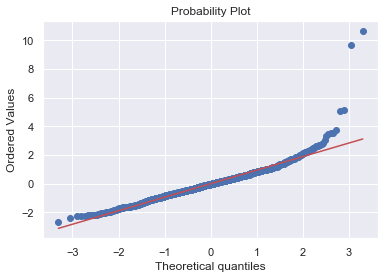

In [23]:
from scipy.stats import probplot
probplot(stand_residuals, plot=plt);

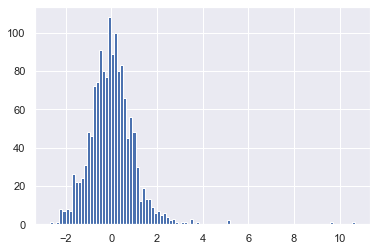

In [24]:
plt.hist(stand_residuals, bins=100);

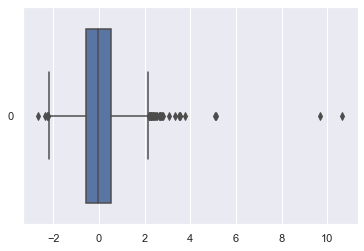

In [25]:
sns.boxplot(data=stand_residuals, orient="h");

In [26]:
from scipy.stats import jarque_bera
jarque_bera(stand_residuals)

(16543.863883531158, 0.0)

### Преобразование данных

In [27]:
ln_y = np.log(y)

In [28]:
ln_ols = OLS(ln_y, x)
ln_results = ln_ols.fit()

In [29]:
ln_results.rsquared

0.8595254401732302

In [30]:
ln_RSS = ln_results.ssr
n, k = x.shape[0], x.shape[1]
ln_sigma2_hat = ln_RSS/(n-k)

In [31]:
ln_influence = ln_results.get_influence()
ln_residuals = ln_influence.resid
ln_stand_residuals = ln_residuals/np.sqrt(ln_sigma2_hat)

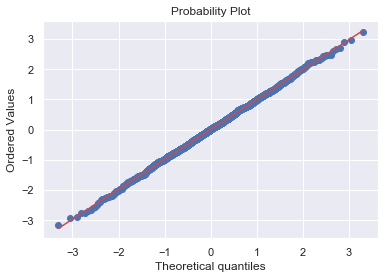

In [32]:
from scipy.stats import probplot
probplot(ln_stand_residuals, plot=plt);

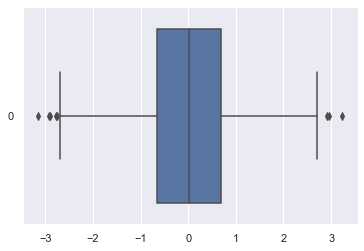

In [33]:
sns.boxplot(data=ln_stand_residuals, orient="h");

In [34]:
from scipy.stats import jarque_bera
jarque_bera(ln_stand_residuals)

(0.06510310527359181, 0.9679725470078617)

### Отбор признаков

In [35]:
def select_best_combination(y, x, metric): #metric: 'aic' или 'bic'
    current_factors = x.columns.to_list() #сначала создаем список всех наименований столбцов
    ols = OLS(y, x[current_factors]) 
    results = ols.fit()
    metric_base = getattr(results, metric) 

    while 1 == 1:
        res = pd.Series(index=current_factors) #создаем Series c индексом current_factors и значениями = Nan
        for factor in current_factors:
            ols = OLS(y, x[list(set(current_factors)-{factor})]) #выкидываем по очереди один столбец
            results = ols.fit()
            res.loc[factor] = getattr(results, metric) #вместо Nan в res записываем метрику, соответствующую модели без данного столбца
        res = res.sort_values(ascending=True) #сортируем res по возрастанию 
        if res.iloc[0] < metric_base:
            current_factors.remove(res.index.values[0])
            metric_base = res.iloc[0]
        else:
            break
            
    ols = OLS(y, x[current_factors])
    results = ols.fit()
    
    return current_factors, results

In [36]:
current_factors, results = select_best_combination(ln_y, x, 'bic')
current_factors

['const',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageArea',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [37]:
set(x.columns.to_list()) - set(current_factors)

{'3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'KitchenAbvGr',
 'LotFrontage',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'WoodDeckSF'}

In [38]:
current_factors, results = select_best_combination(ln_y, x, 'aic')
current_factors

['const',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [39]:
set(x.columns.to_list()) - set(current_factors)

{'1stFlrSF',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'EnclosedPorch',
 'KitchenAbvGr',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'MoSold'}